# __Seattle & Pittsburgh Weather Project__

## __Introduction__

#### For this project, we are looking to use the data science methodology to figure out whether it rains more in Seattle versus another city in the United States. In this case, we are going to compare the rainfall in Seattle, WA to the rainfall in Pittsburgh, PA between the years of 2018-2022 (five-year period). 

#### We collected this data from the US government's National Center for Environmental Information(NCEI), and we used the National Oceanic and Atmospheric Administration (NOAA) to collect our rainfall data. We have good reason to assume that this data was collected with integrity and of high quality.

## __Import Necessary Libraries for Analysis & Importing Datasets__

#### Our first step is to import our necessary libraries into our notebook, which consist of 
#### -pandas (pd) for our data analysis, 
#### -numpy(np) for additional mathematical tools, 
#### -matplotlib.pyplot(plt) for our graphs, 
#### -seaborn (sns), which acts as an additional data visualization project built on matplotlib (we will also set our grid for sns to be white at this stage),
#### -calendar for month modelling,
#### -scipy & stats for statisical modelling,
#### -and statsmodels.stats.proportion + proportions_ztest for z-test modelling.

In [53]:
# Import pands, numpy, and matplotlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# seaborn is a data visualization library built on matplotlib
import seaborn as sns

import calendar
import scipy as sp
from scipy import stats
from statsmodels.stats.proportion import proportions_ztest

#set the plotting style
sns.set_style("whitegrid")

#### Now that we have successfully imported our libraries and graphics tools, we can now being importing our Pittsburgh & Seattle CSV datasets that we collected from the NCEI for analysis. 

#### We will import our data using pandas' pd.read_csv(), and we will import our data from our Github repository for [Seattle](https://raw.githubusercontent.com/CameronMangione/weather/refs/heads/main/data/seattle_rain.csv) and for [Pittsburgh](https://raw.githubusercontent.com/CameronMangione/weather/refs/heads/main/data/pittsburgh_rain.csv').

#### Note that for the method to work properly, we needed to import the raw files, which are linked above.

In [54]:
df_seattle = pd.read_csv('https://raw.githubusercontent.com/CameronMangione/weather/refs/heads/main/data/seattle_rain.csv')

type(df_seattle)

pandas.core.frame.DataFrame

In [55]:
df_pittsburgh = pd.read_csv('https://raw.githubusercontent.com/CameronMangione/weather/refs/heads/main/data/pittsburgh_rain.csv')

type(df_pittsburgh)

pandas.core.frame.DataFrame

#### We have successfully imported the datasets for both Pittsburgh and Seattle, along with identifying that the type in Python is considered to be a pandas dataframe. 

#### For this project, we chose the First Hill rainfall data in Seattle, and Pittsburgh International Airport for Pittsburgh. We can now proceed with our initial analysis of the data.

## __Initial Analysis of Seattle & Pittsburgh Dataframes__

#### For this project, we need both dataframes to have the following data: 
#### -Station
#### -Name
#### -Date
#### -Precipitation data
#### After reviewing the dataframes, we can confirm that both dataframes contain these columns, so we can proceed forward with our analysis.

### Dataframe Counts

#### Our datasets should show 1,826 days (5(years)*365(days)+1(leap day w/in five years) = 1,826 days (counts)). 
#### We noticed that Seattle only contained 1,658 days, and 1,636 days of precipitation, meaning we need to examine this issue further.
#### Our Pittsburgh data showed 1,826 days for our categories we are analyzing, likely meaning we have the data that we need.

### Station Data

#### We can produce a list of a speicfic column here by having our dataframe call all elements for a column such as station data.
#### We used unique and nunique data to confirm that we only have 1 station for each city, so we can proceed with our next step of cleaning our data.

## __Initial Data Cleaning__

### Date Analysis and Datetime Conversion

#### The first step we need to take is pulling information about our dates from our Seattle and Pittsburgh dataframes.

In [68]:
df_seattle['DATE']

0         1/1/18
1         1/2/18
2         1/3/18
3         1/4/18
4         1/5/18
          ...   
1653    12/27/22
1654    12/28/22
1655    12/29/22
1656    12/30/22
1657    12/31/22
Name: DATE, Length: 1658, dtype: object

In [69]:
df_pittsburgh['DATE']

0       2018-01-01
1       2018-01-02
2       2018-01-03
3       2018-01-04
4       2018-01-05
           ...    
1821    2022-12-27
1822    2022-12-28
1823    2022-12-29
1824    2022-12-30
1825    2022-12-31
Name: DATE, Length: 1826, dtype: object

#### We can confirm that both datatypes are objects, so we will need to covert both to a datetime format.

### pd.to_datetime data cleaning

#### Conducting the "pd.to_datetime" pandas method will help us convert our date data into a format that is cleaner for exploratory data analysis and modelling.

In [70]:
df_seattle['DATE'] = pd.to_datetime(df_seattle['DATE'])

/var/folders/j8/rt19hmcs2rx__jyns29v73q40000gn/T/ipykernel_9623/3087519436.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_seattle['DATE'] = pd.to_datetime(df_seattle['DATE'])


In [71]:
df_pittsburgh['DATE'] = pd.to_datetime(df_pittsburgh['DATE'])

#### Our Seattle + Pittsburgh date data are now in datetime format. A warning screen was produced during the Seattle datetime noting that it can't guarantee that all of the data points were udpated properly. We will do an aggregate check to ensure our new format is in datetime for Seattle.

In [72]:
df_seattle['DATE'].agg(['min','max'])

min   2018-01-01
max   2022-12-31
Name: DATE, dtype: datetime64[ns]

#### Datetime format is officially confirmed for both cities. With this now confirmed, we can now start using plots to look at the differences in rainfall between both cities.

### Lineplot Graphical Analysis

#### With our dates now formatted in the datetime format, we can now start to plot our data. A lineplot works well here because we can look at the data for both dataframes to determine if there is anything more we need to do to modify our data.

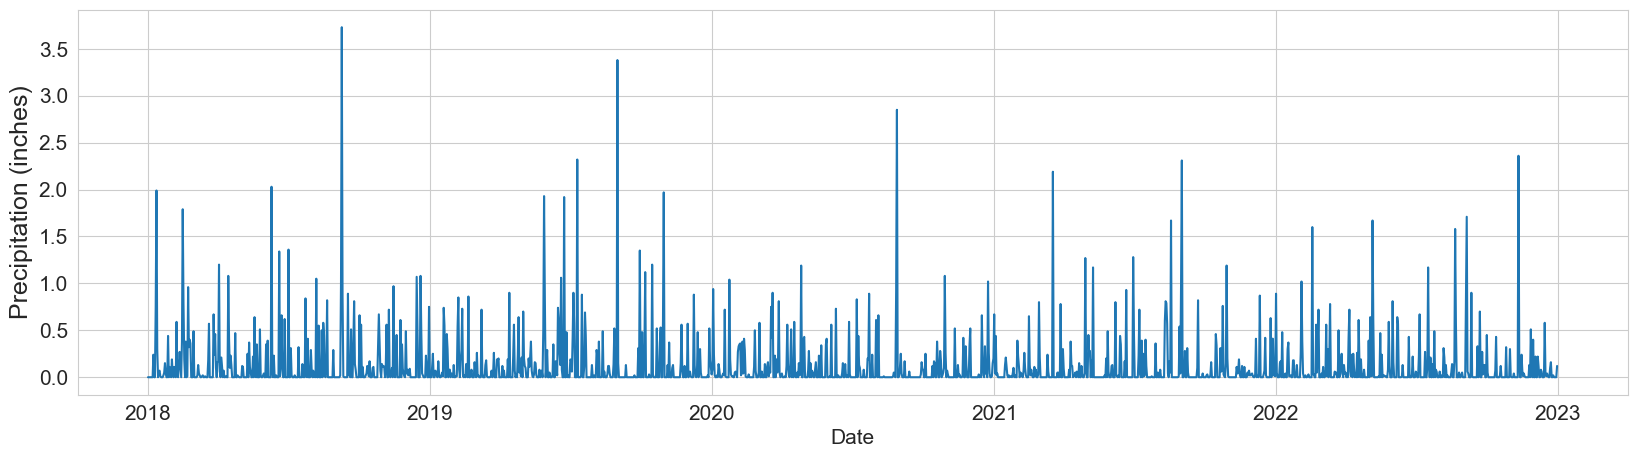

In [73]:
plt.figure(figsize=(20,5))

sns.lineplot(data=df_pittsburgh, x='DATE', y='PRCP')

plt.xlabel('Date', fontsize=15)
plt.ylabel('Precipitation (inches)', fontsize=18)

plt.tick_params(labelsize=15)

plt.show()

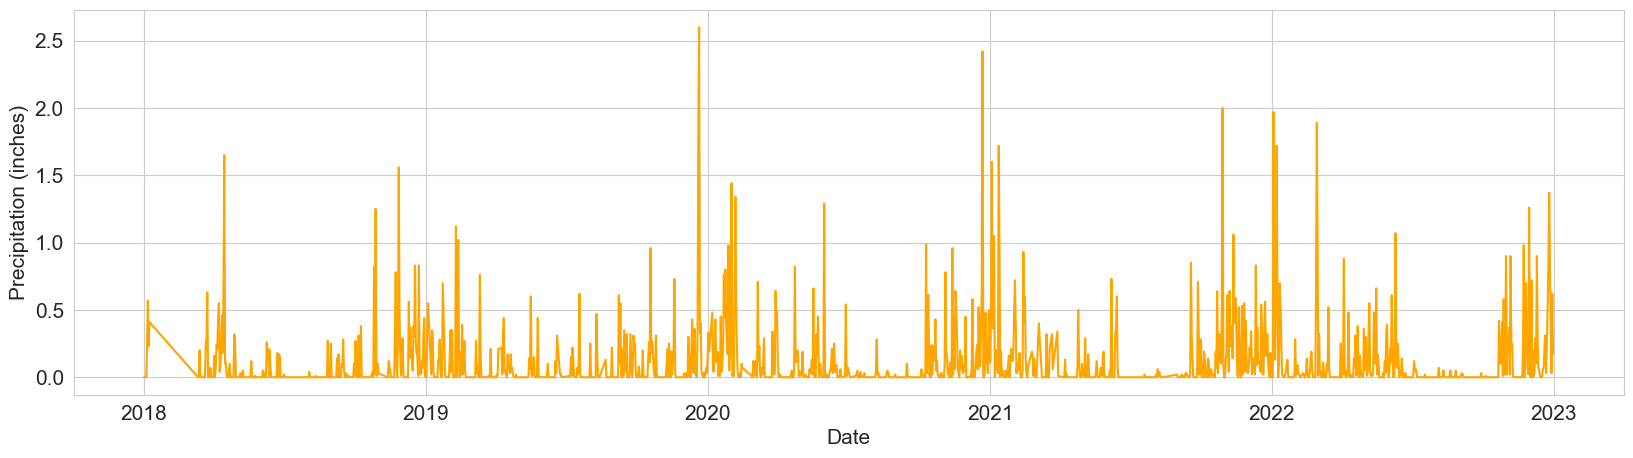

In [105]:
plt.figure(figsize=(20,5))

sns.lineplot(data=df_seattle, x='DATE', y='PRCP', color='orange')

plt.xlabel('Date', fontsize=15)
plt.ylabel('Precipitation (inches)', fontsize=15)

plt.tick_params(labelsize=15)

plt.show()

#### The Pittsburgh lineplot is shows all of the values in our time range, and is suitable for future analysis.

#### The Seattle lineplot shows a downward pointing line at the beginning of 2018, which is an indicator of the NaN data that we initially found in our Seattle. This missing data means we will need to imputate this data, and investigate it more.

#### Our next step is to merge the two datasets so we can better analyze our data.

### Merging the Seattle and Pittsburgh Datasets

#### One issue that came up in our initial lineplot analyses is that we could not directly compare Seattle precipitation to Pittsburgh precipitation.

#### The Seattle and Pittsburgh dataframes shows a lot of columns that we would not need. Therefore, we will only take DATE and PRCP from both dataframes.

### Outer Join Merge

#### To join these two dataframes, we are using a full outer join merge because we want to directly compare every day(w/ nulls) of SEA & PIT. 

#### The computation below shows the steps for computing our full outer with date and precipitation (date being the what the data is joined on here).

In [75]:
df = df_pittsburgh[['DATE', 'PRCP']].merge(df_seattle[['DATE','PRCP']], on='DATE', how='outer')

In [76]:
df

,DATE,PRCP_x,PRCP_y
0,2018-01-01,0.00,0.00
1,2018-01-02,0.00,0.00
2,2018-01-03,0.00,0.00
3,2018-01-04,0.00,0.00
4,2018-01-05,0.00,0.25
...,...,...,...
1821,2022-12-27,0.00,0.78
1822,2022-12-28,0.00,0.40
1823,2022-12-29,0.00,0.03
1824,2022-12-30,0.00,0.62


#### One issue here is that we have one dataset that is equal to x(Pittsburgh) and 1 that is equal to y(Seattle). This does not make for great comparisons of the data, since we want these two cities to be compared as 1 variable. 

#### We can use the melt method to combine both datasets, along with updating the format of the table as well.

### Melt Method

#### We used our already defined variable of "df" to be equal to the pandas method of pd.melt, which consists of 
#### -the dataframe (df) 
#### -the id_vars = 'DATE' (not melted)
#### -the var_name = 'city' (new variable name)
#### - the value_name = 'precipitation' (variable we want to measure).

In [77]:
df = pd.melt(df, id_vars='DATE', var_name='city', value_name='precipitation')

#### This melt worked successfully because now we have a table that shows the date, a section that shows the city, and then the precipitation values for the city on the far right column.

#### To make our table look cleaner, we are going to redefine our column variables in our next step.

### __Renaming city and date columns__

#### The .loc method will help us rename our city data to something that is more clear. 
#### We set this up by taking our __"df"__ dataframe and referring it to the city column where the values are equal to 'PRCP_x' and setting that equal to __"PIT"__. 
#### We then do the same thing for "PRCP_y" and set it equal to SEA. 
#### We check that they were set up properly by using the head and tail of the dataframe since "PIT" shows up at the top and "SEA" shows up at the bottom.

In [78]:
df.loc[df['city'] == 'PRCP_x', 'city'] = 'PIT'

In [79]:
df.loc[df['city'] == 'PRCP_y', 'city'] = 'SEA'

#### We can the .rename() method to rename the date to not be in all caps to make the data look cleaner.

In [80]:
df = df.rename(columns={'DATE': 'date'})

#### This data cleaning has given us a combined dataframe that we can now use to more easily breakdown and compare our data, and to also sort it more easily for our final data cleaning step.

## __Data Imputation__

### Identifying Non-Null Data

#### One way to clean NaN data is by impute the NaN datapoints, but first we need to identify the breakdown of the Non-Null data by using the "isna().sum()" and ".loc" methods.
#### We can use the .loc method to access and filter our dataframe by our respective cities, and use the "isna().sum()".

In [81]:
df.loc[df['city'] == 'PIT', 'precipitation'].isna().sum()

np.int64(0)

In [82]:
df.loc[df['city'] == 'SEA', 'precipitation'].isna().sum()

np.int64(190)

#### The results show 190 NaN values in Seattle, so we will need to impute our data as our next step.

### DatetimeIndex Method and Mean Day Precipitation Calculation

#### We decided to take the mean average precipitation per day of the year for our dataframe, and impute that information to clean our missing Seattle dates. We need to use indicies to identify the specific days that were NaNs in the Seattle area.

#### To do so, we will need to first define a new variable to add to our table called 'day_of_year'. From there, we will set that equal to the "pd.DatetimeIndex" pandas method.

In [83]:
df['day_of_year'] = pd.DatetimeIndex(df['date']).day_of_year

#### To do our mean day precipitation calculation, we define a new variable of 'mean_day_precipitation', and set that equal to the dataframe setting a .loc method of city == 'SEA', then referencing the precipitation value on day_of_year, and then using the "groupby" method to group all of those Seattle days by day of year and then calculating the mean.

In [84]:
mean_day_precipitation = df.loc[df['city'] == 'SEA',['precipitation','day_of_year']].groupby('day_of_year').mean()

#### We can then plot these means by using a lineplot.

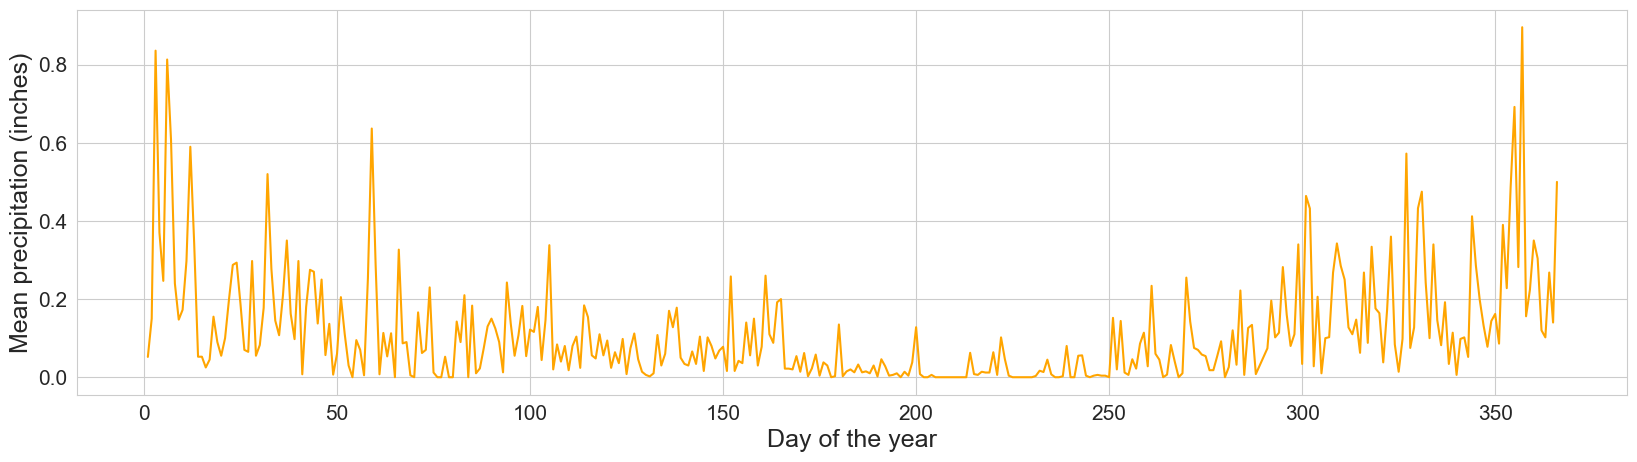

In [85]:
plt.figure(figsize=(20, 5))

sns.lineplot(data=mean_day_precipitation, x='day_of_year',y='precipitation', color='orange')

plt.xlabel('Day of the year', fontsize=18)
plt.ylabel('Mean precipitation (inches)', fontsize=18)

plt.tick_params(labelsize=15)

plt.show()

#### This lineplot shows all of the mean rainfall on each day of the year, and also loooks mostly consistent with how we would consider rainfall to look in Seattle.

#### Because we can't see where all of the NaNs are from our 'df' dataframe, we will need to use indexing to track them down.

### Indexing

#### We can define a variable called 'indices' that uses numpy to identify all of our NaN values in an array, and we can use the df'precipitation'.isna()' to find them.

In [86]:
indices = np.where(df['precipitation'].isna() == True) [0]

#### We can use a for loop to create a variable index that looks for values in our indices array, look at the precipitation column, and then use mean day precipitation to apply the mean values to the Seattle indicies that are NaN in the data frame to replace them.

In [87]:
for index in indices:
    df.loc[index, 'precipitation'] = mean_day_precipitation.loc[df.loc[index,'day_of_year']].values[0]

#### With that our data is finally cleaned, and we can begin exploratory data analysis.

## __Exploratory Data Analysis__

### Combined Lineplot & Descriptive Statistics

#### Now that the dataframes have been cleaned and merged, we can now create a combined lineplot. This is much more useful for setting a foundation for the exploratory data analysis that we are looking to conduct.

#### Note here that hue = 'city') means that's how the cities are separated, as well as defining the key for the lineplot as well.

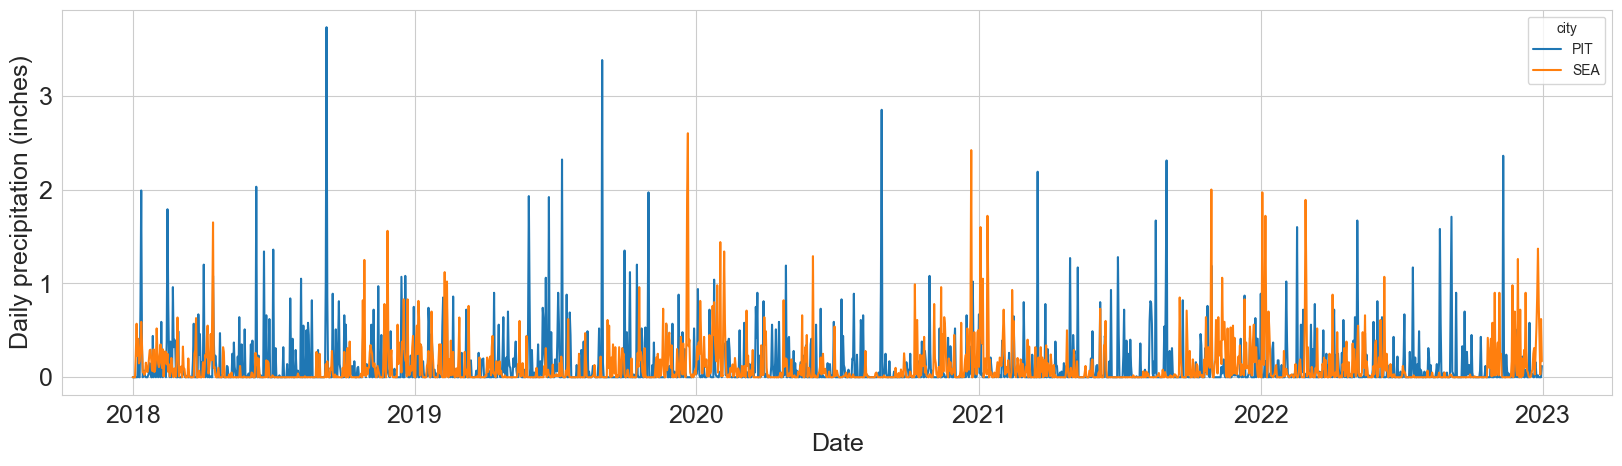

In [88]:
plt.figure(figsize=(20,5))

sns.lineplot(data=df, x='date',y='precipitation', hue='city')

plt.xlabel('Date', fontsize=18)
plt.ylabel('Daily precipitation (inches)', fontsize=18)

plt.tick_params(labelsize=18)

plt.show()

#### In addition to the lineplot here, we can also create descriptive statistics using the __".describe()"__ method. 
#### ".describe()" shows us the total count for each city, the mean, the standard deviation, the min, 25%, median (50%), 75%, and the max. The five stats at the end can be used to make boxplots for our analysis as well. 

#### We can also use the __".mean()"__ method here if we don't want all of the other statistics in the descirbe method.

In [89]:
df[['city', 'precipitation']].groupby('city').describe()

precipitation                                                
             count      mean       std  min  25%   50%   75%   max
city                                                              
PIT         1826.0  0.127393  0.304978  0.0  0.0  0.00  0.11  3.73
SEA         1826.0  0.113270  0.240516  0.0  0.0  0.01  0.12  2.60

In [90]:
df[['city', 'precipitation']].groupby('city').mean()

,precipitation
city,
PIT,0.127393
SEA,0.113270


### Barplots

#### We can use seaborn to make a bar plot of the mean daily precipitation.

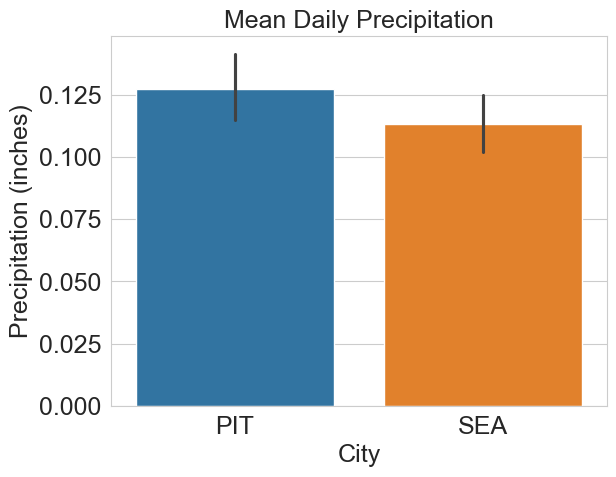

In [91]:
sns.barplot(data=df, x='city', y='precipitation', hue='city')

plt.ylabel('Precipitation (inches)', fontsize=18)
plt.xlabel('City', fontsize=18)
plt.title('Mean Daily Precipitation', fontsize=18)

plt.tick_params(labelsize=18)

plt.show()

#### I honestly like seeing a representation of the mean daily precipitation and I think it's useful, but it does have issues in solving our question. 
#### Average daily rain  has a lot of variance and does not tell us much about where that rainfall comes over a longre period of time.

### pd.DatetimeIndex

#### We can create a precipitation by month by using the pd.DatetimeIndex pandas method. 

In [92]:
df['month'] = pd.DatetimeIndex(df['date']).month

#### Now that our months data is correctly set up, we can plot the distribution of precipitation amounts each month using boxplots.

### Boxplots

#### Note here that ylim is also used to zoom in on the boxplot to see a more simplified view.

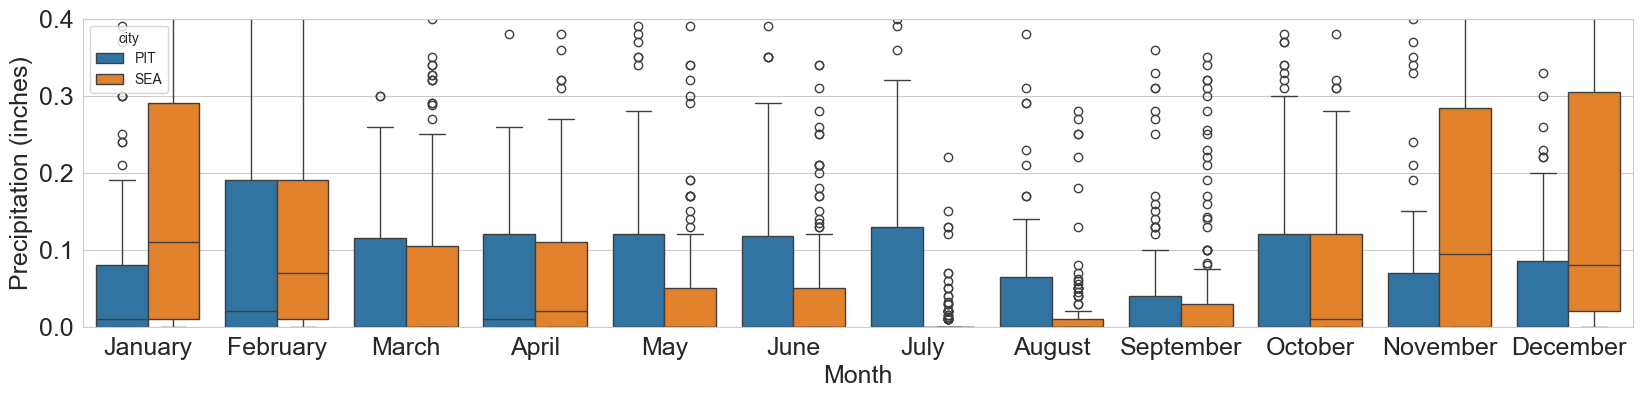

In [93]:
plt.figure(figsize=(20,4))

sns.boxplot(data=df, x='month', y='precipitation', hue='city')

plt.xlabel('Month', fontsize=18)
plt.ylabel('Precipitation (inches)', fontsize=18)

plt.tick_params(labelsize=18)

# Get month names and set as x-axis tick labels
import calendar
month_names = list(calendar.month_name[1:]) #Get month names
plt.xticks(ticks=range(12), labels=month_names) #Set x-axis ticks to month names

plt.ylim(0, 0.4) #zoom in

plt.show()

#### A lot of data gets cut off here, so one way around that is to orient the boxplot horizontally.
#### We can do so by adding __"orient='h'"__ to the sns.boxplot.

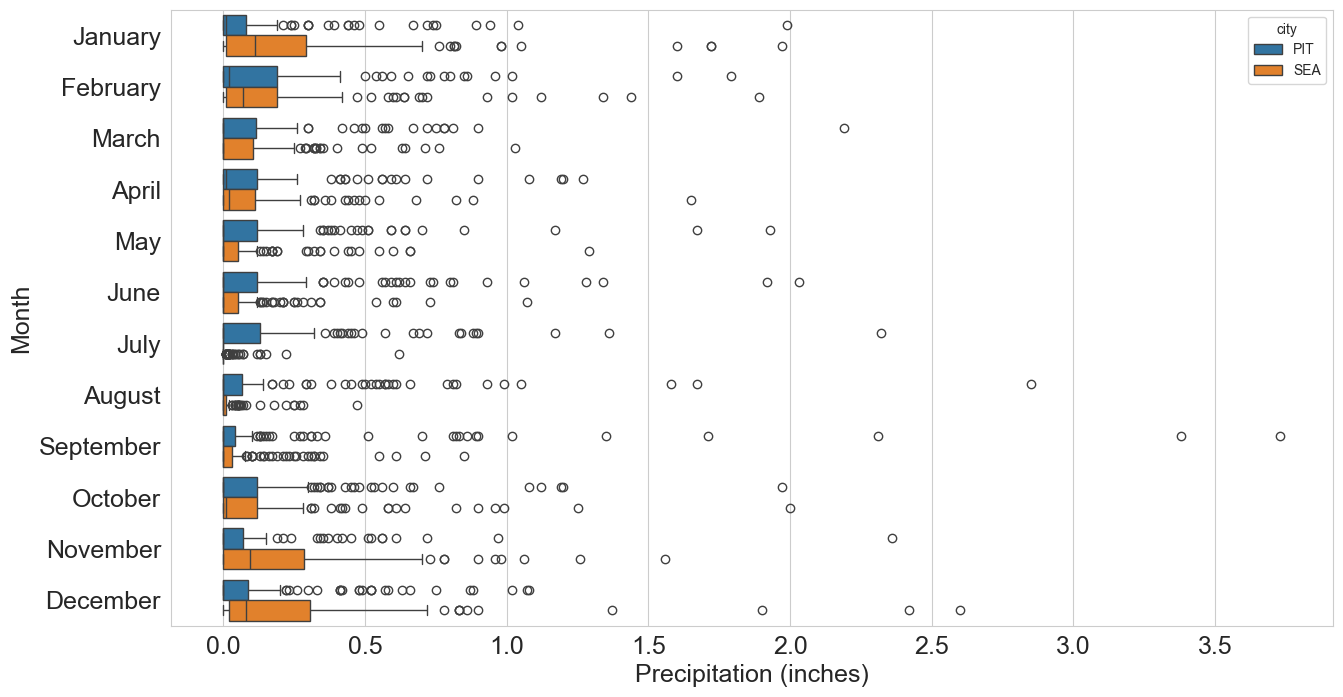

In [94]:
plt.figure(figsize=(15,8))

sns.boxplot(data=df, y='month', x='precipitation', hue='city', orient='h')

plt.ylabel('Month', fontsize=18)
plt.xlabel('Precipitation (inches)', fontsize=18)

plt.tick_params(labelsize=18)

# Get month names and set as x-axis tick labels
import calendar
month_names = list(calendar.month_name[1:]) #Get month names
plt.yticks(ticks=range(12), labels=month_names) #Set y-axis ticks to month names

plt.show()

#### The horizontal view shows more detail in the boxplot because it can cover more area. 
#### Boxplots are a great representation of the minimum, first quartile (25% percentile), median (50% percentile), third quartile (75th percentile, and the maximum. It is also good for showing outliers. However, it is not as amenable to how we can use mean calculations that we are going to discuss next.

### Mean Monthly Barplots & Propotions of Daily Precipitation

#### We can use a barplot to describe mean precipitation for each month.

#### This barplot will be very useful for some modelling test we will conduct latet.

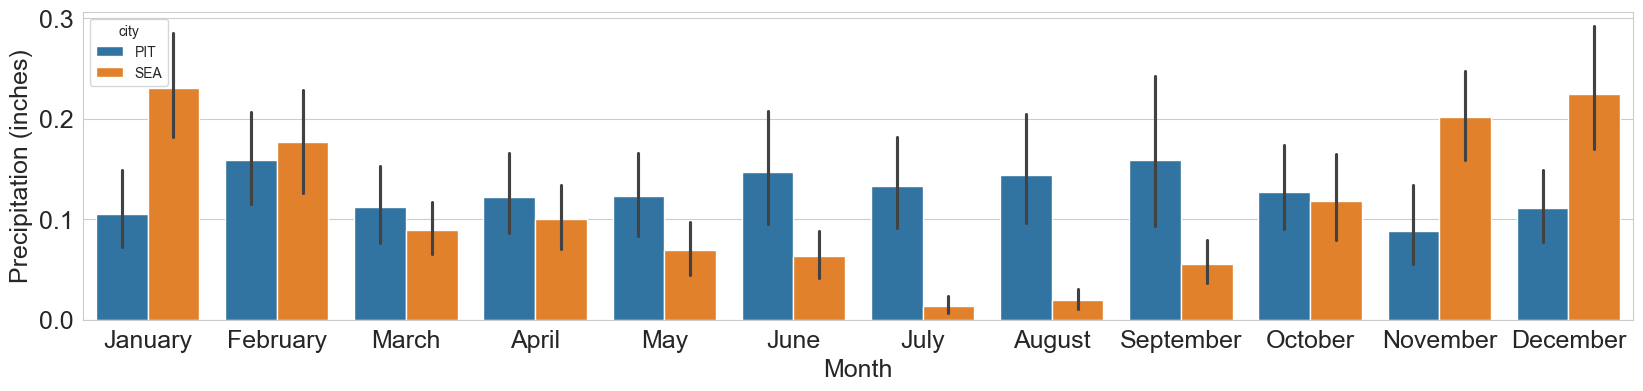

In [95]:
plt.figure(figsize=(20,4))

sns.barplot(data=df, x='month', y='precipitation', hue='city')

plt.xlabel('Month', fontsize=18)
plt.ylabel('Precipitation (inches)', fontsize=18)

plt.tick_params(labelsize=18)

plt.xticks(ticks=range(12), labels=month_names)

plt.show()

#### We can also compute the mean precipittation each month using the groupby and mean methods we used earlier.

#### Note that to execute this chart we need to call city, month, and precipitation, but our group_by will only be city and month because we will use those two variables to group the precipitation mean values.

In [96]:
df[['month', 'precipitation','city']].groupby(['city', 'month']).mean()

precipitation
city month               
PIT  1           0.105097
     2           0.158794
     3           0.111935
     4           0.122400
     5           0.123290
     6           0.147400
     7           0.133355
     8           0.144194
     9           0.158933
     10          0.126903
     11          0.087867
     12          0.111613
SEA  1           0.230742
     2           0.176472
     3           0.089075
     4           0.100483
     5           0.069161
     6           0.063167
     7           0.013984
     8           0.019995
     9           0.055622
     10          0.118452
     11          0.201867
     12          0.224903

#### We are now going to look into plotting the porportion of days with any precipitation.
#### The nice thing about this variable is we define the new column and then we just need it to look at if the values in the precipitation column are greater than 0.

In [97]:
df['any precipitation'] = df['precipitation'] > 0

#### With the any precipitation column added, we can now plot the porportion of days with any precipitation over the 5 years using a barplot.

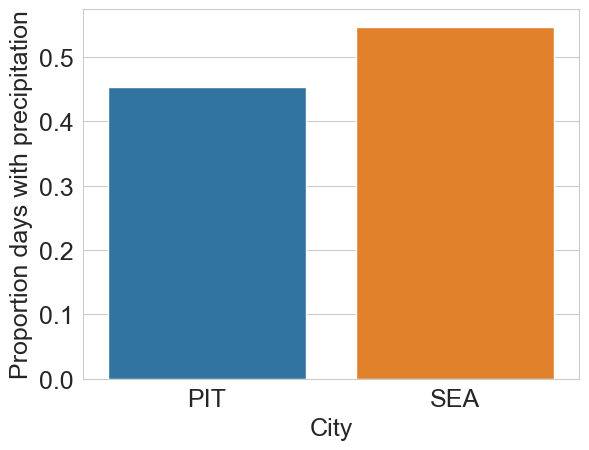

In [98]:
sns.barplot(data=df, x='city', y='any precipitation', hue='city', errorbar=None)

plt.xlabel('City', fontsize=18)
plt.ylabel('Proportion days with precipitation', fontsize=18)

plt.tick_params(labelsize=18)

plt.show()

#### This barplot is useful becasue it tells us that Seattle gets rain on more days than Pittsburgh does by about 10%.
#### We can also show this proportion by month as well.

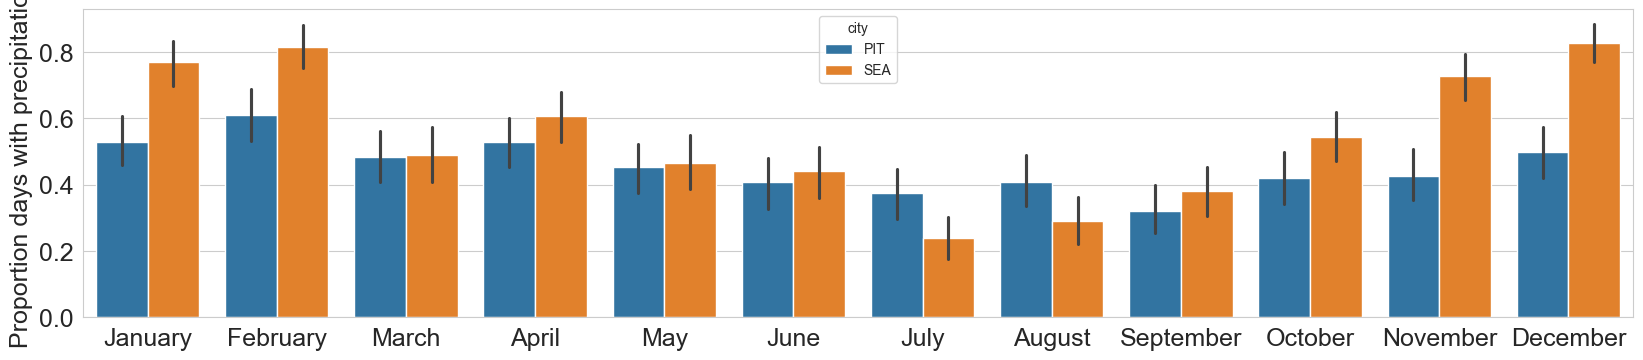

In [99]:
plt.figure(figsize=(20,4))

sns.barplot(data=df, x='month', y='any precipitation', hue='city')

plt.xlabel(None)
plt.ylabel('Proportion days with precipitation', fontsize=18)
plt.xticks(ticks=range(12), labels=month_names)
plt.tick_params(labelsize=18)

plt.show()

#### This barplot is very useful for finding the proportion of days per month that it rains in each city. 
#### We could apply a statistical test to this answer our initial question.

## __Modelling__

### Histogram

#### We could try plotting a histogram per month to see if it helps answer our initial question

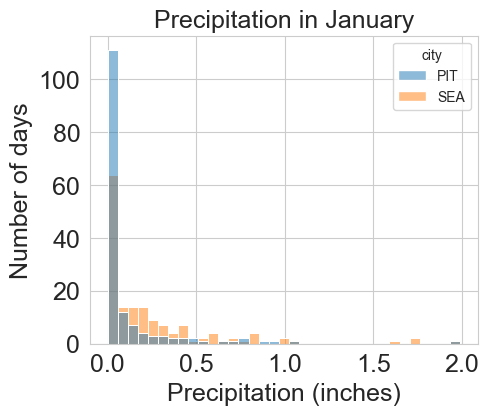

In [100]:
plt.figure(figsize=(5,4))

sns.histplot(data=df.loc[df['month'] == 1], x='precipitation', hue = 'city')

plt.xlabel('Precipitation (inches)', fontsize=18)
plt.ylabel('Number of days', fontsize=18)
plt.title('Precipitation in January', fontsize=18)

plt.tick_params(labelsize=18)

plt.show()

#### This historgram is not as useful for modelling because it skews heavily to the right.
#### This phenomenon happens because there are many days in a month where no precipitation happens.

### SciPy Imports & Significance Testing

#### In this test, the significance level is equal to 0.05. Significantly different is identified using a zero array that is the size of 12 months. 
#### We run a for loop to compare monthly precipitation.
#### We then run a t-test to set the foundation for determing the significance test.
#### The results of the significance there are then printed, with the t-statistic going out to two decimal points, and the p-value going out to three decimal points.

In [101]:
significance_level = 0.05
significantly_different = np.zeros(12)

#Perform t-test for each month
for month in range (1,13):
    #Get precipitation data for Seattle and Pittsburgh for the current month
    sea_data = df.loc[(df['city'] == 'SEA') & (df['month'] == month), 'precipitation']
    pit_data = df.loc[(df['city'] == 'PIT') & (df['month'] == month), 'precipitation']

    t_statistic, p_value = stats.ttest_ind(sea_data, pit_data, equal_var=False)

    if p_value < significance_level:
        significantly_different[month-1] = 1

    print(f"Month {month}:")
    print(f" t-statistic = {t_statistic: .2f}")
    print(f" p-value t test= {p_value:.3f}")
    print("-" * 20)

Month 1:
 t-statistic =  3.71
 p-value t test= 0.000
--------------------
Month 2:
 t-statistic =  0.50
 p-value t test= 0.615
--------------------
Month 3:
 t-statistic = -0.93
 p-value t test= 0.351
--------------------
Month 4:
 t-statistic = -0.85
 p-value t test= 0.394
--------------------
Month 5:
 t-statistic = -2.13
 p-value t test= 0.034
--------------------
Month 6:
 t-statistic = -2.83
 p-value t test= 0.005
--------------------
Month 7:
 t-statistic = -4.84
 p-value t test= 0.000
--------------------
Month 8:
 t-statistic = -4.26
 p-value t test= 0.000
--------------------
Month 9:
 t-statistic = -2.40
 p-value t test= 0.017
--------------------
Month 10:
 t-statistic = -0.28
 p-value t test= 0.782
--------------------
Month 11:
 t-statistic =  3.79
 p-value t test= 0.000
--------------------
Month 12:
 t-statistic =  3.20
 p-value t test= 0.002
--------------------


#### This barplot below uses matplotlib to add an indicator of significance in our month for loop that tests for significant differences in mean monthly precipitation.

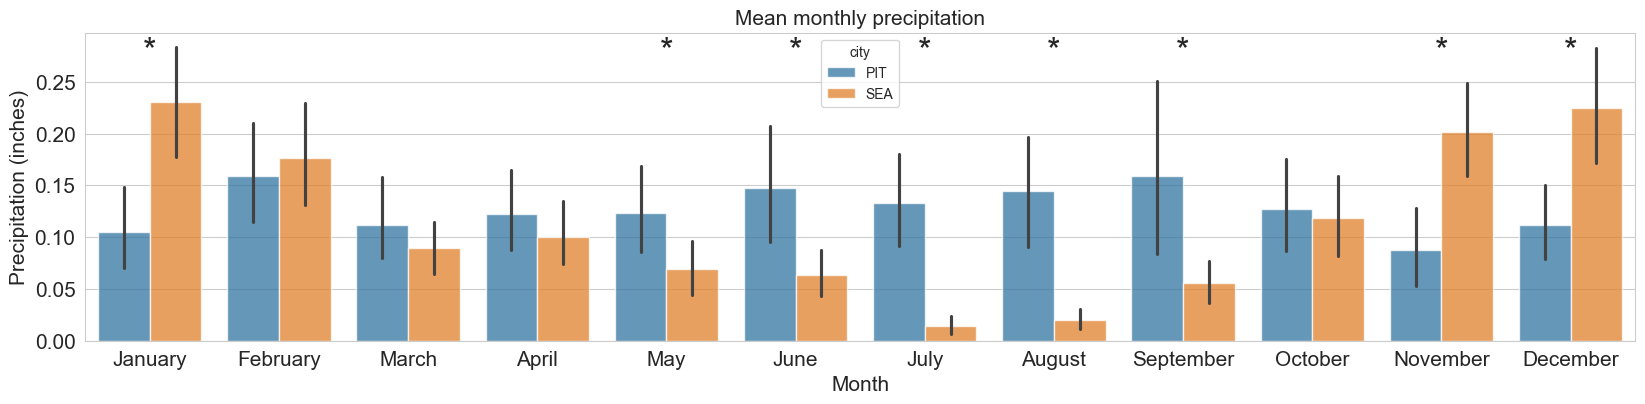

In [102]:
plt.figure(figsize=(20,4))

sns.barplot(data=df, x='month', y='precipitation', hue='city', alpha=0.75)

plt.xlabel('Month', fontsize=15)
plt.ylabel('Precipitation (inches)', fontsize=15)
plt.title('Mean monthly precipitation', fontsize=15)

plt.tick_params(labelsize=15)

plt.xticks(ticks=range(12), labels=month_names)

#Add star for significantly different months
for month in range(12):
    if significantly_different[month] == 1:

        #Add a star
        plt.text(month, 0.27, '*', ha='center', fontsize=25)

plt.show()

#### I think this barplot is the best answer to the original question of this project.

### __Contingency Table & z-tests__

#### We can create a contingency table using the "pd.crosstab()" pandas method, and we have our dataframe look at df'month' and extract 'city' and 'any precipitation' into a table that displays the number of times it rained in a month.

In [103]:
contingency_table = pd.crosstab(df.loc[df['month'] == month, 'city'], df.loc[df['month'] == month, 'any precipitation'])

contingency_table

any precipitation,False,True
city,,
PIT,86,64
SEA,41,109


#### We can use this data to conduct our z-test.

In [104]:
siginifcance_level = 0.05
significantly_different_proportion = np.zeros(12)

#Perform t-test for each month
for month in range(1,13):

    #Create a contingency table for Seattle and Pittsburgh for the current month:
    contingency_table = pd.crosstab(df.loc[df['month'] == month, 'city'], df.loc[df['month'] == month, 'any precipitation'])

    #Calculate the number of True values (days with precipitation) for each city
    days_with_precipitation = contingency_table[True]

    #Calculate the total number of days for each city
    total_counts = contingency_table.sum(axis=1)

    #Hypothesis Test
    zstat, p_value = proportions_ztest(count=days_with_precipitation, nobs=total_counts, alternative='two-sided')

    if p_value < significance_level:
        significantly_different_proportion[month-1]=1

    print(f"Month {month}:")
    print(f" t-statistic = {t_statistic: .2f}")
    print(f" p-value t test= {p_value:.3f}")
    print("-" * 20)

Month 1:
 t-statistic =  3.20
 p-value t test= 0.000
--------------------
Month 2:
 t-statistic =  3.20
 p-value t test= 0.000
--------------------
Month 3:
 t-statistic =  3.20
 p-value t test= 0.910
--------------------
Month 4:
 t-statistic =  3.20
 p-value t test= 0.162
--------------------
Month 5:
 t-statistic =  3.20
 p-value t test= 0.820
--------------------
Month 6:
 t-statistic =  3.20
 p-value t test= 0.559
--------------------
Month 7:
 t-statistic =  3.20
 p-value t test= 0.010
--------------------
Month 8:
 t-statistic =  3.20
 p-value t test= 0.032
--------------------
Month 9:
 t-statistic =  3.20
 p-value t test= 0.276
--------------------
Month 10:
 t-statistic =  3.20
 p-value t test= 0.031
--------------------
Month 11:
 t-statistic =  3.20
 p-value t test= 0.000
--------------------
Month 12:
 t-statistic =  3.20
 p-value t test= 0.000
--------------------


#### Our z-test shows that there significant differences for proportions of daily rain in January, February, July, August, October, November, and December.

## __Conclusion__

#### Overall, we saw significant differences in rainfall between Pittsburgh and Seattle in the summer months (particularly July, and August), and in the winter months (particularly November, December and January.